MAE: 7.14166666666667
RMSE: 12.954286613575695
R2 Score: 0.9856569622507123
Predicted Sales: 457.425


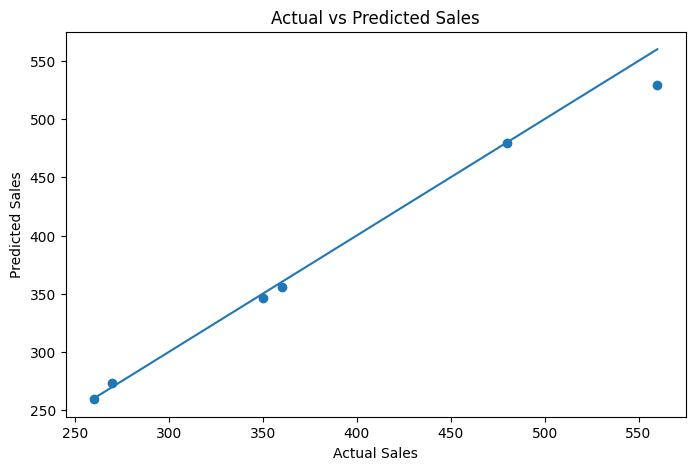

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df=pd.read_csv("sales_data.csv")

x=df.drop("sales", axis=1)
y=df["sales"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

model=RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


new_data = pd.DataFrame({
    "price": [125],
    "promotion": [1],
    "advertising_spend": [4800],
    "store_visits": [310]
})

prediction = model.predict(new_data)
print("Predicted Sales:", prediction[0])



plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()